In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, Tuple

In [2]:
def bissection(
      f: Callable[[float], float], 
      a: float, 
      b: float, 
      tol: float, 
      iterations:int
      ) -> float:
    if iterations < 0:
      raise ValueError("Iterations cannot be less than 0")
    
    f_a : float = f(a)
    f_b : float = f(b)
    mid_point : float = (a + b) / 2.0
    f_mid : float = f(mid_point)
    
    if iterations == 0 or abs(f_mid) < tol:
       return mid_point
    else:
       if f_a * f_mid < 0:
          return bissection(f, a, mid_point, tol, iterations - 1)
       else:
          return bissection(f, mid_point, b, tol, iterations - 1)

In [3]:
def false_position(
    f: Callable[[float], float],
    a : float, 
    b : float, 
    tol : float,
    iterations:int
    ) -> float:
    if iterations < 0:
      raise ValueError("Iterations cannot be less than 0")
    
    f_a : float = f(a)
    f_b : float = f(b)
    mid_point : float = (a * f_b - b * f_a) / (f_b - f_a)
    f_mid : float = f(mid_point)
    
    if iterations == 0 or abs(f_mid) < tol:
       return mid_point
    else:
       if f_a * f_mid < 0:
          return false_position(f, a, mid_point, tol, iterations - 1)
       else:
          return false_position(f, mid_point, b, tol, iterations - 1)

In [4]:
def newton_rhapson_method(
    f: Callable[[float], float],
    df: Callable[[float], float],
    guess: float,
    tol: float,
    iterations: int
  ) -> float:
  if iterations < 0:
    raise ValueError("Iterations cannot be less than 0")
  
  f_guess = f(guess)
  df_guess = df(guess)

  if iterations == 0 or abs(f_guess) < tol:
    return guess
  else:
    new_guess = guess - f_guess / df_guess
    return newton_rhapson_method(f, df, new_guess, tol, iterations - 1)

In [5]:
def secant_method(
    f: Callable[[float], float],
    guess: float,
    tol: float,
    iterations: int
  ) -> float: 
  df_approximation = lambda x: (f(x) - f(x - 1e-6)) / 1e-6
  return newton_rhapson_method(f, df_approximation, guess, tol, iterations)

In [6]:
def false_position_plotting(
    f: Callable[[float], float],
    a : float, 
    b : float, 
    iterations:float
    ):
    df_errors = pd.DataFrame(columns=["iter", "error"])
    for it in range(0, iterations):
        f_a : float = f(a)
        f_b : float = f(b)
        mid_point : float = (a * f_b - b * f_a) / (f_b - f_a)
        f_mid : float = f(mid_point)

        if f_a * f_mid < 0:
            b = f_mid
        else:
            a = f_mid
            
        df_errors = pd.concat([
            df_errors,
            pd.Series({"iter" : it, "error": abs(f_mid)}).to_frame().T
        ]) 
    
    df_errors.plot(x="iter", y="error")
    plt.show()
    print(df_errors)


In [7]:
bissection(lambda x: x**3 -9*x + 5, 0.5, 1.0, 0.05, 5)

0.578125

In [8]:
false_position(lambda x: x**3 -9*x + 5, 0.5, 1.0, 0.05, 5)

0.5770344044260434

C:\Users\jelso\AppData\Local\Temp\ipykernel_22384\1620729796.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_errors = pd.concat([


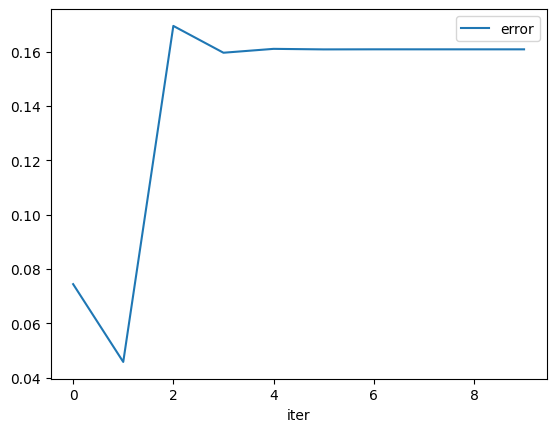

   iter     error
0   0.0  0.074419
0   1.0  0.045798
0   2.0  0.169448
0   3.0  0.159582
0   4.0  0.161007
0   5.0  0.160808
0   6.0  0.160836
0   7.0  0.160832
0   8.0  0.160833
0   9.0  0.160833


In [13]:
false_position_plotting(lambda x: x**3 -9*x + 5, 0.5, 1.0, 10)

In [10]:
fn = lambda x: x**2 - 5
d_fn = lambda x: 2*x
newton_rhapson_method(fn, d_fn, 3.0, 10e-4, 5)

2.2360688956433634

In [11]:
fn = lambda x: x**2 - 5
secant_method(fn, 3.0, 10e-4, 5)

2.23606889516846

In [12]:
fn = lambda x: x**2 - 5
d_fn = lambda x: 2*x
guess_newton = 3.0
guess_secant = 3.0
for it in range(0, 5):
  guess_newton = newton_rhapson_method(fn, d_fn, guess_newton, 10e-4, 1)
  guess_secant = secant_method(fn, guess_secant, 10e-4, 1)
  print(f"secant = {guess_secant}, newton = {guess_newton}, abs dif = {abs(guess_secant - guess_newton):.10f}")

secant = 2.3333332223055114, newton = 2.3333333333333335, abs dif = 0.0000001110
secant = 2.23809521316707, newton = 2.238095238095238, abs dif = 0.0000000249
secant = 2.23606889516846, newton = 2.2360688956433634, abs dif = 0.0000000005
secant = 2.23606889516846, newton = 2.2360688956433634, abs dif = 0.0000000005
secant = 2.23606889516846, newton = 2.2360688956433634, abs dif = 0.0000000005
